In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [28]:
# Read in data
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(20491, 2)
(500, 2)


In [7]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


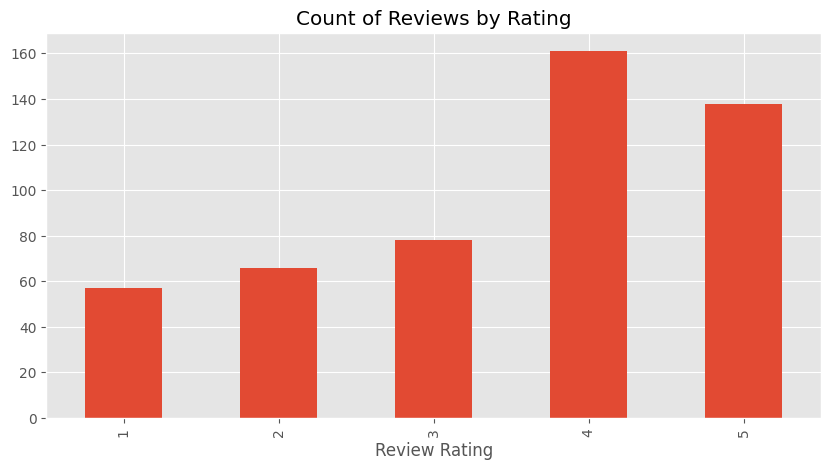

In [9]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Rating',
          figsize=(10, 5))
ax.set_xlabel('Review Rating')
plt.show()

In [11]:
example = df['Review'][50]
print(example)

excellent way stayed inn market memorial day weekend, room large great view water sure request way advance, hotel quiet fully booked crowded, service impeccable staff well-mannered friendly, ca n't fault anything.it great location right pike place market near lots great restaurants like etta chez shea,  


In [12]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['excellent',
 'way',
 'stayed',
 'inn',
 'market',
 'memorial',
 'day',
 'weekend',
 ',',
 'room']

In [13]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.9782}

In [19]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['Rating']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Rating'})
vaders = vaders.merge(df, how='left')

In [21]:
# Now we have sentiment score and metadata
vaders.head()

,Rating,neg,neu,pos,compound,Review
0,4,0.056,0.598,0.346,0.9872,nice hotel expensive parking got good deal sta...
1,4,0.056,0.598,0.346,0.9872,"excellent staff, housekeeping quality hotel ch..."
2,4,0.056,0.598,0.346,0.9872,nice value seattle stayed 4 nights late 2007. ...
3,4,0.056,0.598,0.346,0.9872,nice hotel good location hotel kimpton design ...
4,4,0.056,0.598,0.346,0.9872,"great hotel night quick business trip, loved l..."


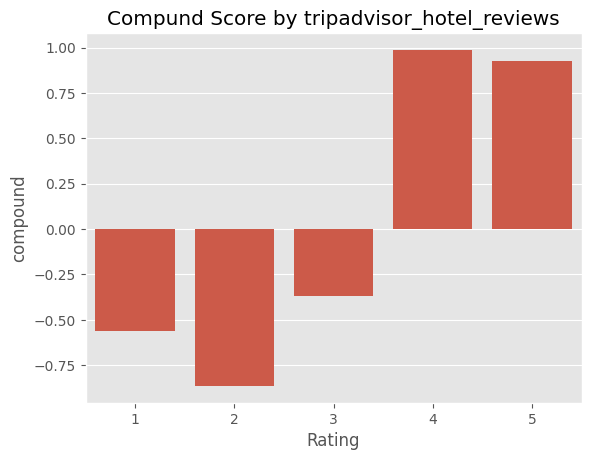

In [24]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by tripadvisor_hotel_reviews')
plt.show()